In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

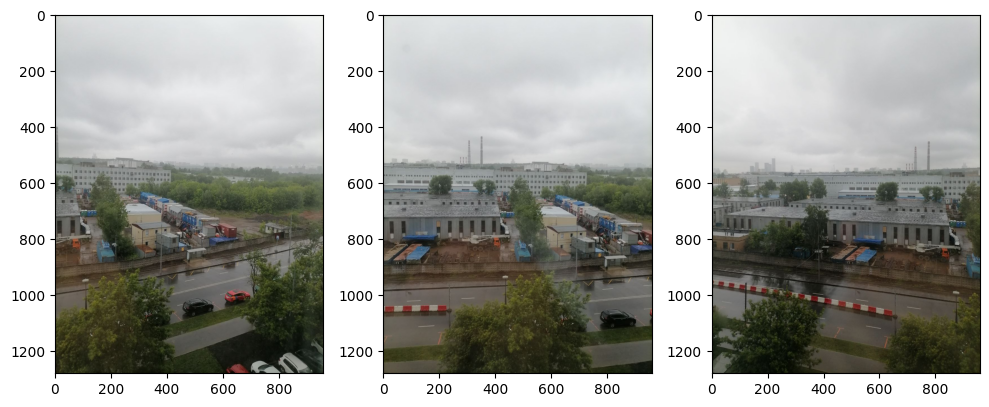

In [9]:
img1p = '/home/led/MAI/ML/data/first.jpg'
img2p = '/home/led/MAI/ML/data/second.jpg'
img3p = '/home/led/MAI/ML/data/third.jpg'

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for image_pat, ax in zip([img1p,img2p,img3p], axs):
    image = plt.imread(image_pat)
    ax.imshow(image)
plt.tight_layout()
plt.show()

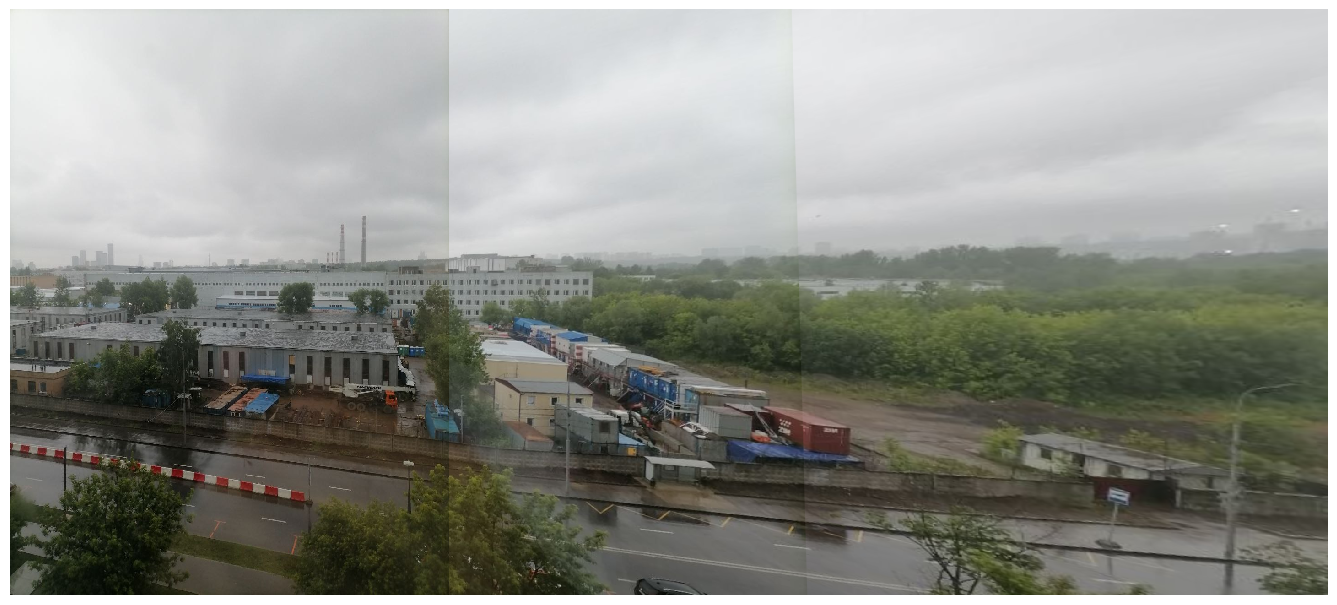

In [15]:
# import cv2
# import numpy as np

def homography(source, dest):
    # Prepare images for descriptors
    source_g = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
    dest_g = cv2.cvtColor(dest, cv2.COLOR_BGR2GRAY)

    # Initialize sift keypoint detector
    sift = cv2.SIFT_create()
    # Find keypoints on each img
    source_kp, source_d = sift.detectAndCompute(source_g, None)
    dest_kp, dest_d = sift.detectAndCompute(dest_g, None)

    # Match keypoints

# FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary
    matcher = cv2.FlannBasedMatcher(index_params,search_params)
    matches = matcher.knnMatch(source_d, dest_d, k=2)

    # Фильтрация соответствий с помощью метрики Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Нахождение матрицы гомографии
    src_pts = np.float32([source_kp[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([dest_kp[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    return H

def append(source, dest):
    H = homography(source, dest)
    # Преобразование изображений
    panorama = cv2.warpPerspective(source, H, (source.shape[1] + dest.shape[1], dest.shape[0]))
    panorama[0:dest.shape[0], 0:dest.shape[1]] = dest
    return panorama

# Загрузка изображений
img1 = cv2.imread(img1p)
img2 = cv2.imread(img2p)
img3 = cv2.imread(img3p)
# img4 = cv2.imread('data/4.jpeg')

panorama = append(img1, img2)
# panorama = append(panorama, img4)
panorama = append(panorama, img3)
plt.figure(figsize = (17,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB), interpolation='nearest')